# Challenge (4/8): Datos abiertos del Instituto Nacional de Estadística y Geografía (INEGI)

¡Ya estás a medio camino, Dani! Lo estás haciendo increíble y por eso te tengo una misión importante 😉
Hoy vamos a elaborar uno de los elementos más importantes del tablero. ¡Hoy haremos un mapa! 😃 Al final de cuentas, estamos hablando del INEGI. No podríamos llegar a la entrevista sin un mapa ¿Estás de acuerdo? 😅 

Pero antes de continuar, permíteme hacer una recapitulación de lo que aprendiste en el reto anterior:
1. Comparación entre variables categóricas, tomando en cuenta periodos y/o elementos para desagregar.
2. Representar la participación de cada variable categórica en un total a tomar en cuenta

Siguiendo la dinámica del reto anterior, ahora toca explorar nuestro archivo Shapefile.

## 1. Mapas
Esta será una de las partes centrales de tu tablero. Piensa en el tipo de mapa base que iría bien con tu tablero.

Completa las siguientes tareas:
1. Identifica si alguna de las preguntas que planteaste en el primer reto pueden explorarse con un mapa. Si no tienes alguna ¡Es buen momento para formularla!
2. Explora el archivo Shapefile de INEGI con GeoPandas y ubica la (o las) columna que te ayudaría a responder tu pregunta.
3. Utiliza el código visto en clase para crear un mapa y visualizar los datos.

In [1]:
# Importación de librerías 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
!pip install geopandas
!pip install contextily
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 16.7 MB 34.9 MB/s 
     |████████████████████████████████| 6.3 MB 52.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import geopandas as gpd
import contextily as ctx # for basemaps
from shapely.geometry import Point, LineString, Polygon

In [4]:
# Carga de datos desde Colab
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [5]:
# Carga del dataframe
%cd /content/drive/MyDrive/Colab Notebooks/conjunto_de_datos/
df = pd.read_csv('denue_inegi_54_.csv', encoding = 'ISO-8859-1') # Categoría de "Servicios profesionales, científicos y técnicos" (2022) del DENUE

# Para los campos de tipo fecha se convirtió el campo fecha_alta de object a date
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], errors = 'coerce', yearfirst=True, infer_datetime_format = True)

# Limpieza de la columna per_ocu
df['per_ocu'] = df['per_ocu'].map(lambda x: x.replace(' a ', '-').replace(' personas', ''))

# Función para convertir los rangos de personas empleadas en números enteros
def cleaner(x):
  r = list()
  if x == '251 y más':
    r.append(251)
  else:
    x = x.split('-')
    for i in x:
      r.append(int(i))
  
  return r

df['per_ocu_int'] = df['per_ocu'].apply(lambda x: np.mean(cleaner(x)))

df.head()

/content/drive/MyDrive/Colab Notebooks/conjunto_de_datos


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,per_ocu_int
0,8525230,01001541310000931000000000U2,11:11 ARQUITECOS,NaN,541310,Servicios de arquitectura,0-5,CALLE,GENERAL MIGUEL BARRAGAN,PRIVADA,...,0549,21,4498041302.0,CHRISTIAN@1111ARQUITECTOS.COM,WWW.1111ARQUITECTOS.COM,Fijo,21.888813,-102.288903,2019-11-01,2.5
1,6905372,01001541510000971000000000U3,5TO COLOR,NaN,541510,Servicios de diseño de sistemas de cómputo y s...,0-5,CALLE,MAR CARIBE,CALLE,...,2009,18,NaN,5T0COLORESTUDIO@GMAIL.COM,NaN,Fijo,21.898620,-102.313587,2019-11-01,2.5
2,6142345,01001236113000073010000000U1,9.15 ARQUITECTOS,NaN,541310,Servicios de arquitectura,11-30,CALLE,SIERRA DEL HUMO,AVENIDA,...,2259,8,4491290879.0,GERENCIA@9.15ARQ.MX,WWW.915ARQ.MX,Fijo,21.913782,-102.312156,2010-07-01,20.5
3,37160,01001541110003931000000000U3,A&A DESPACHO JURIDICO,NaN,541110,Bufetes jurídicos,0-5,CALLE,CHICHIMECO,AVENIDA,...,0816,43,NaN,ARIASGO@HOTMAIL.COM,NaN,Fijo,21.877087,-102.280368,2014-12-01,2.5
4,10599,01001541910000031001000000U8,AB MKT,AB MERCADOTECNIA SC,541910,Servicios de investigación de mercados y encue...,6-10,BOULEVARD,LUIS DONALDO COLOSIO,CALLE,...,2390,19,4499128611.0,NaN,WWW.ABMERCADOTECNIA.COM,Fijo,21.924182,-102.311750,2010-07-01,8.0


### ¿En donde se localizan la mayor parte de las organizaciones oferentes de servicios de diseño de sistemas de cómputo y servicios relacionados en México en 2022?

In [6]:
# Dataset para un mapa coroplético 

df_map = df[df['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'].\
          groupby(by = 'entidad', as_index = False).agg(count = ('nombre_act','size')).sort_values(by = 'count', ascending = False)
df_map['percentage'] = (df_map['count'] / np.sum(df_map['count'])) *100
df_map['entidad'] = df_map['entidad'].map(lambda x: x.title().replace('De','de').strip())
df_map.head()

,entidad,count,percentage
6,Ciudad de México,1046,29.332586
18,Nuevo León,429,12.030286
13,Jalisco,283,7.936063
16,México,171,4.795289
10,Guanajuato,147,4.122266


In [7]:
# Se revisa el nombre exacto de cada uno de las entidades en el dataset
df_map.sort_values('entidad')

,entidad,count,percentage
0,Aguascalientes,76,2.131239
1,Baja California,107,3.000561
2,Baja California Sur,13,0.364554
3,Campeche,14,0.392597
4,Chiapas,28,0.785193
5,Chihuahua,117,3.280987
6,Ciudad de México,1046,29.332586
7,Coahuila de Zaragoza,82,2.299495
8,Colima,29,0.813236
9,Durango,31,0.869321


In [8]:
# Construcción de un diccionario de las entidades con sus respectivas claves en el archivo GeoJSON (véase más abajo)
states_dict = {'Aguascalientes': 'AS', 
            'Baja California': 'BC', 
            'Baja California Sur': 'BS', 
            'Campeche': 'CC',
            'Ciudad de México':'DF',
            'Chiapas': 'CS',
            'Chihuahua':'CH',
            'Coahuila de Zaragoza':'CL',
            'Colima':'CM',
            'Durango':'DG',
            'México':'MC',
            'Guanajuato':'GT',
            'Guerrero':'GR',
            'Hidalgo':'HG',
            'Jalisco':'JC',
            'Michoacán de Ocampo':'MN',
            'Morelos':'MS',
            'Nayarit':'NT',
            'Nuevo León':'NL',
            'Oaxaca':'OC',
            'Puebla':'PL',
            'Querétaro':'QT',
            'Quintana Roo':'QR',
            'San Luis Potosí':'SP',
            'Sinaloa':'SL',
            'Sonora':'SR',
            'Tabasco':'TC',
            'Tamaulipas':'TS',
            'Tlaxcala':'TL',
            'Veracruz de Ignacio de La Llave':'VZ',
            'Yucatán':'YN',
            'Zacatecas':'ZS'}

states_df = pd.DataFrame.from_dict(states_dict, orient='index').reset_index().rename(columns={"index": "State", 0: "ID"}).set_index('State')
states_df.head()

,ID
State,
Aguascalientes,AS
Baja California,BC
Baja California Sur,BS
Campeche,CC
Ciudad de México,DF


In [9]:
# Construcción del dataset final para la generación del mapa cloroplético
df_map = df_map.set_index('entidad').join(states_df, how = 'left')
df_map.head()

,count,percentage,ID
entidad,,,
Ciudad de México,1046,29.332586,DF
Nuevo León,429,12.030286,NL
Jalisco,283,7.936063,JC
México,171,4.795289,MC
Guanajuato,147,4.122266,GT


In [10]:
# Mapa cloroplético con Plotly Express
fig = px.choropleth(df_map, 
                            geojson = 'https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json', 
                            locations='ID', 
                            color='percentage',
                            color_continuous_scale="Blues",
                            scope="north america",
                            #title='Demand of Data Jobs per Mexican State',
                            labels={'percentage':'% del total'},
                            height= 500,
                            width = 800                 
                            )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title_x=0.5, font=dict(size=14))
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


**Reference for JSON file:**

- **Arroyo-Velázquez, M. I. (2022).** *_statesmx*. https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json


### Lectura del archivo SHP en GeoPandas

In [11]:
!ls

ce_09_valor.csv      denue_inegi_54_.fix  denue_inegi_54_.shp
denue_inegi_54_.csv  denue_inegi_54_.prj  denue_inegi_54_.shx
denue_inegi_54_.dbf  denue_inegi_54_.qix


In [12]:
df_geo = gpd.read_file('denue_inegi_54_.shp')
df_geo.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,181278,03008541110000801000000000U4,BUFETE DE ABOGADOS CHAVIRA Y ASOCIADOS,None,541110,Bufetes jurídicos,0 a 5 personas,CALLE,JUPITER,CALLE,...,1706,011,6241458280,LEGICOCHA@HOTMAIL.COM,None,Fijo,22.924809,-109.931361,2014-12,POINT (-109.93136 22.92481)
1,7089994,03008541110001281000000000U8,BUFETE FISCAL-LEGAL,BUFET FISCAL -LEGAL,541110,Bufetes jurídicos,0 a 5 personas,CALLE,MIGUEL HIDALGO Y COSTILLA,AVENIDA,...,0873,031,6246887816,BUFETECABOLEX@GMAIL.COM,None,Fijo,22.892621,-109.920834,2019-11,POINT (-109.92083 22.89262)
2,163596,03003541110000371000000000U9,BUFET JURIDICO,None,541110,Bufetes jurídicos,0 a 5 personas,CALLE,FRANCISCO I. MADERO,CALLE,...,2267,005,6121223093,GILARREDONDO@HOTMAIL.COM,None,Fijo,24.157446,-110.318231,2010-07,POINT (-110.31823 24.15745)
3,7090436,03008541110001301000000000U4,BUFETE ASESORIA JURIDICA Y ADMINISTRATIVA LEX,None,541110,Bufetes jurídicos,0 a 5 personas,AVENIDA,LOS CABOS,CALLE,...,0962,032,6242276952,JURIDICOCONTABLE2019@GMAIL.COM,None,Fijo,22.895451,-109.940974,2019-11,POINT (-109.94097 22.89545)
4,165123,03003541211000091001000000U9,BUFETE GERENCIAL DE SERVICIOS,BUFFETE GERENCIAL DE SERVICIOS SC,541211,Servicios de contabilidad y auditoría,0 a 5 personas,CALLE,YUCATAN,CALLE,...,2017,030,6121288863,CLIENTES_BUGS@OUTLOOK.COM,None,Fijo,24.145324,-110.302878,2010-07,POINT (-110.30288 24.14532)


In [13]:
# Limpieza de la columna per_ocu
df_geo['per_ocu'] = df_geo['per_ocu'].map(lambda x: x.replace(' a ', '-').replace(' personas', ''))
df_geo['per_ocu_int'] = df_geo['per_ocu'].apply(lambda x: np.mean(cleaner(x)))
df_geo['per_ocu_int'].head()

0    2.5
1    2.5
2    2.5
3    2.5
4    2.5
Name: per_ocu_int, dtype: float64

In [14]:
df_geo['geometry']

0         POINT (-109.93136 22.92481)
1         POINT (-109.92083 22.89262)
2         POINT (-110.31823 24.15745)
3         POINT (-109.94097 22.89545)
4         POINT (-110.30288 24.14532)
                     ...             
107875     POINT (-97.67784 20.91382)
107876     POINT (-96.97057 19.38592)
107877     POINT (-89.57725 21.02609)
107878     POINT (-89.62357 21.00934)
107879     POINT (-89.59374 20.98999)
Name: geometry, Length: 107880, dtype: geometry

In [15]:
df_geo.bounds

,minx,miny,maxx,maxy
0,-109.931361,22.924809,-109.931361,22.924809
1,-109.920834,22.892621,-109.920834,22.892621
2,-110.318231,24.157446,-110.318231,24.157446
3,-109.940974,22.895451,-109.940974,22.895451
4,-110.302878,24.145324,-110.302878,24.145324
...,...,...,...,...
107875,-97.677839,20.913825,-97.677839,20.913825
107876,-96.970566,19.385923,-96.970566,19.385923
107877,-89.577248,21.026091,-89.577248,21.026091
107878,-89.623570,21.009342,-89.623570,21.009342


In [16]:
df_geo.boundary

0         GEOMETRYCOLLECTION EMPTY
1         GEOMETRYCOLLECTION EMPTY
2         GEOMETRYCOLLECTION EMPTY
3         GEOMETRYCOLLECTION EMPTY
4         GEOMETRYCOLLECTION EMPTY
                    ...           
107875    GEOMETRYCOLLECTION EMPTY
107876    GEOMETRYCOLLECTION EMPTY
107877    GEOMETRYCOLLECTION EMPTY
107878    GEOMETRYCOLLECTION EMPTY
107879    GEOMETRYCOLLECTION EMPTY
Length: 107880, dtype: geometry

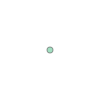

In [17]:
df_geo.geometry[0]

In [18]:
df_geo.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [19]:
df_geo.area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
107875    0.0
107876    0.0
107877    0.0
107878    0.0
107879    0.0
Length: 107880, dtype: float64

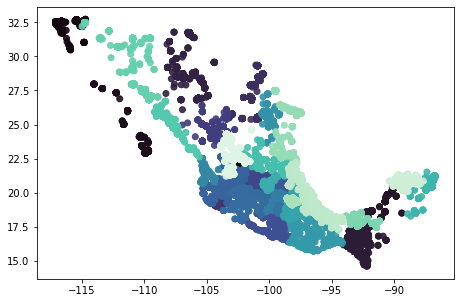

In [20]:
# Mapa con todas las ubicaciones de organizaciones oferentes de servicios profesionales y técnicos
ax = df_geo.plot(figsize=(10,5), alpha=0.9, cmap='mako',  column='entidad')

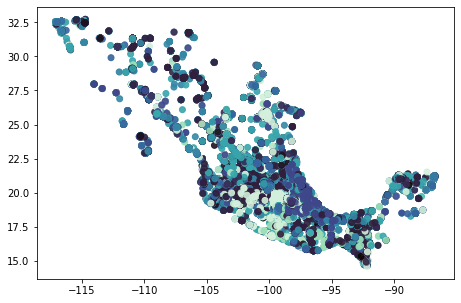

In [21]:
# Mapa con todas las ubicaciones de organizaciones oferentes de servicios profesionales y técnicos
ax = df_geo.plot(figsize=(10,5), alpha=0.9, cmap='mako',  column='nombre_act')

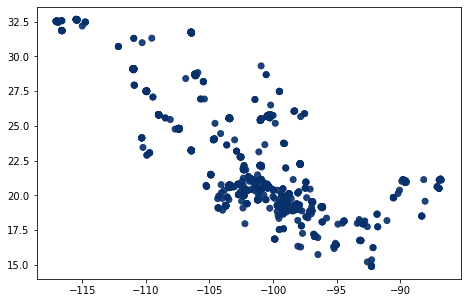

In [22]:
# Mapa con todas las ubicaciones de organizaciones oferentes de servicios de computación
ax = df_geo[df_geo['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'].\
      plot(figsize=(10,5), alpha=0.9, cmap='Blues_r', column = 'nombre_act')

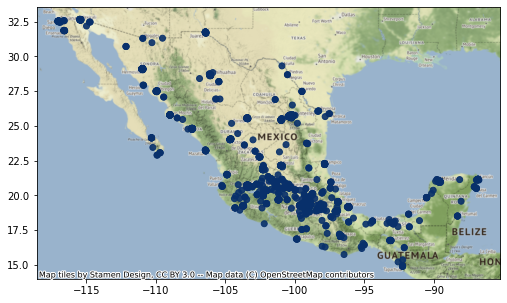

In [23]:
# Mapa con todas las ubicaciones de organizaciones oferentes de servicios de computación sobre un mapa base
ax = df_geo[df_geo['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'].\
      plot(figsize=(10,5), alpha=0.9, cmap='Blues_r', column = 'nombre_act')
ctx.add_basemap(ax, crs=df_geo.crs, 
                )

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



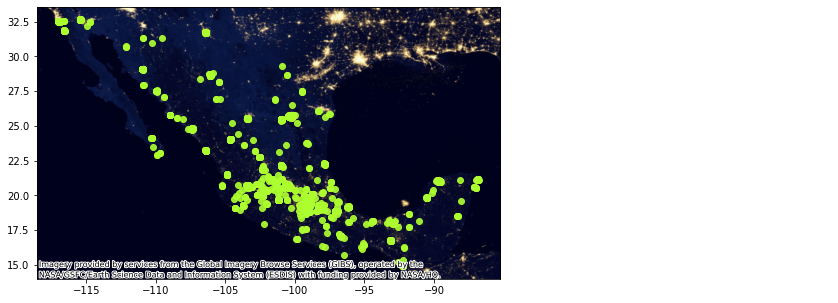

In [24]:
# Mapa con todas las ubicaciones de organizaciones oferentes de servicios de computación sobre un mapa base nocturno
ax = df_geo[df_geo['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'].\
      plot(figsize=(10,5), alpha=0.9, color='greenyellow', column = 'nombre_act')
ctx.add_basemap(ax, crs=df_geo.crs, 
                source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012
                )

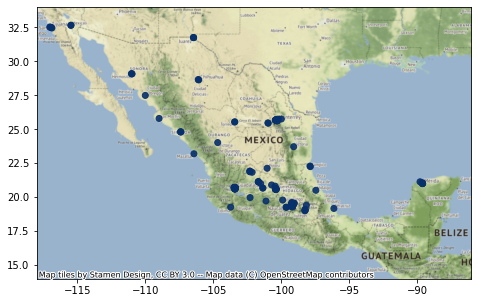

In [25]:
# Mapa con todas las ubicaciones de organizaciones oferentes de servicios de computación con un número de empleados mayor a 50 sobre un mapa base
ax = df_geo[(df_geo['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados') & (df_geo['per_ocu_int'] > 50)].\
      plot(figsize=(10,5), alpha=0.9, cmap='Blues_r', column = 'nombre_act')
ax.set_xlim([-118,-86])
ax.set_ylim([14,34])
ctx.add_basemap(ax, crs=df_geo.crs, 
                )

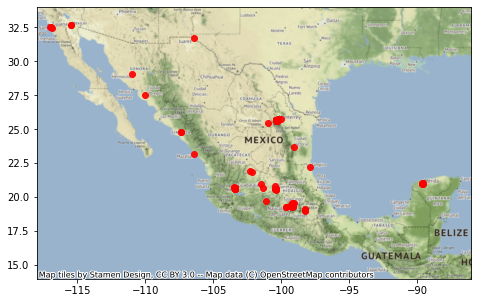

In [26]:
# Mapa con todas las ubicaciones de organizaciones oferentes de servicios de computación con un número de empleados mayor a 100 sobre un mapa base
ax = df_geo[(df_geo['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados') & (df_geo['per_ocu_int'] > 100)].\
      plot(figsize=(10,5), alpha=0.9, color='red')
ax.set_xlim([-118,-86])
ax.set_ylim([14,34])
ctx.add_basemap(ax, crs=df_geo.crs, 
                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning:

Attempting to set identical bottom == top == 2199067.704486497 results in singular transformations; automatically expanding.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning:

Attempting to set identical left == right == -11040566.003194503 results in singular transformations; automatically expanding.



[(2089114.3192621723, 2309021.089710822),
 (-11592594.303354228, -10488537.703034779)]

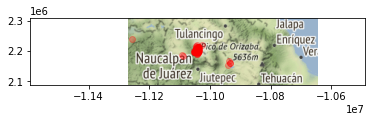

In [36]:
# Creación de un close-up para uno de los puntos
df_geo_comp = df_geo[(df_geo['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados') \
                 & (df_geo['per_ocu_int'] > 100)]
index = 30
w,s,e,n = df_geo_comp.iloc[index]['geometry'].bounds

img, ext = ctx.bounds2img(w, s, e, n, 6, ll=True) #ll significa que las coordenadas están en lat-lon
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img, extent=ext)
# limits2img devuelve cosas en epsg: 3857, por lo que necesitamos trazar los datos en el mismo crs
df_geo_comp.to_crs(epsg=3857).plot(ax=ax, color='red', alpha=0.3)
ax_bounds = df_geo_comp.to_crs(epsg=3857).iloc[index]['geometry'].bounds
ax.set(xlim=[ax_bounds[0],ax_bounds[2]],ylim=[ax_bounds[1],ax_bounds[3]])

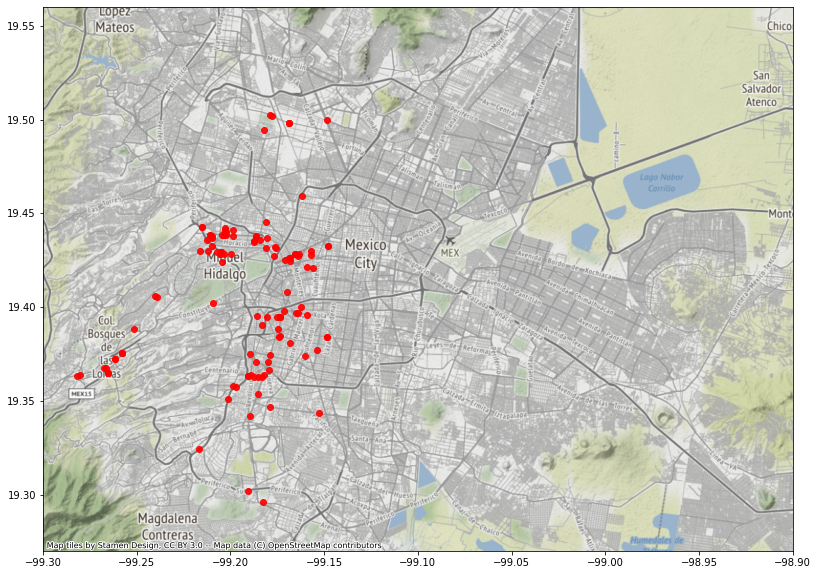

In [44]:
# Mapa con todas las ubicaciones de organizaciones oferentes de servicios de computación con un número de empleados mayor a 100 en Ciudad de México
ax = df_geo[(df_geo['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados') & (df_geo['per_ocu_int'] > 100) &
            (df_geo['entidad'] == 'CIUDAD DE MÉXICO')].\
      plot(figsize=(15,10), alpha=0.9, color='red')
ax.set_xlim([-99.3,-98.9])
ax.set_ylim([19.27,19.56])
ctx.add_basemap(ax, crs=df_geo.crs, 
                )

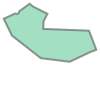

In [45]:
# Polígono de Polanco, unas de las zonas de la Ciudad de México con mayor concentración de organizaciones oferentes de servicios en computación
coordinates = [
              (-99.201908,19.42742),
               (-99.191008,19.426044),
               (-99.183283,19.429687),
               (-99.180965,19.430577),
               (-99.183712,19.437781),
               (-99.200943,19.438448),
               (-99.200835,19.441281),
               (-99.199376,19.444154),
               (-99.204741,19.446825),
               (-99.206049,19.447938),
               (-99.210062,19.445045),
               (-99.210148,19.444458),
               (-99.210877,19.444033),
               (-99.211478,19.444276),
               (-99.215856,19.442273),
               (-99.212766,19.435919),
               (-99.201908,19.42742)
                ]
poly = Polygon(coordinates)
poly

In [46]:
# Creación de un dataframe con la nueva geometría
polygons = gpd.GeoDataFrame()
polygons['geometry'] = None
polygons.loc[0, 'geometry'] = poly
polygons.loc[0, 'location'] = 'Polanco'
polygons = polygons.set_crs('epsg:4326')
polygons

,geometry,location
0,"POLYGON ((-99.20191 19.42742, -99.19101 19.426...",Polanco


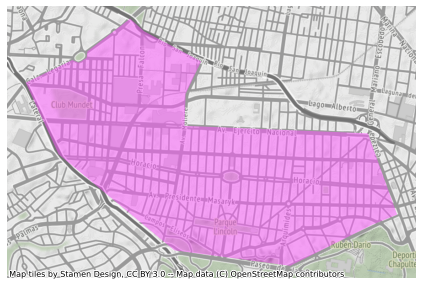

In [47]:
# Dibujo del polígono de Polanco sobre el mapa base
ax = polygons.to_crs(epsg=3857).plot(figsize=(10,5),alpha = 0.5, color='#FF55FF')
ctx.add_basemap(ax)
ax.set_axis_off() # borra los ejes x-y

In [ ]:
# End